**Predicting Energy Consumption Patterns in Commercial Buildings Using Historical Energy Data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('buildstock.csv', on_bad_lines='skip', low_memory=False)


In [ ]:
df.head()

,Building,Schedules,Usage Level,Orientation,Eaves,Door Area,Overhangs,Interior Shading,Doors,Hot Water Fixtures,...,Federal Poverty Level,Window Areas,Insulation Ceiling,Insulation Roof,Insulation Wall,HVAC Cooling Partial Space Conditioning,Infiltration,REEDS Balancing Area,Generation And Emissions Assessment Region,City
0,1,Stochastic,Low,Northwest,2 ft,20 ft^2,NaN,"Summer = 0.7, Winter = 0.85",Fiberglass,50% Usage,...,300-400%,F18 B18 L18 R18,R-30,"Unfinished, Uninsulated","Wood Stud, R-11",100% Conditioned,7 ACH50,99,SRVCc,In another census Place
1,2,Stochastic,Medium,Northwest,2 ft,20 ft^2,NaN,"Summer = 0.7, Winter = 0.85",Fiberglass,100% Usage,...,400%+,F12 B12 L12 R12,R-7,"Unfinished, Uninsulated","Wood Stud, Uninsulated",NaN,25 ACH50,24,RMPAc,Not in a census Place
2,3,Stochastic,Medium,South,2 ft,20 ft^2,NaN,"Summer = 0.7, Winter = 0.85",Fiberglass,100% Usage,...,0-100%,F15 B15 L15 R15,NaN,"Finished, R-49","Brick, 12-in, 3-wythe, Uninsulated",100% Conditioned,15 ACH50,63,ERCTc,"TX, Irving"
3,4,Stochastic,Low,Southwest,2 ft,20 ft^2,NaN,"Summer = 0.7, Winter = 0.85",Fiberglass,50% Usage,...,0-100%,F12 B12 L12 R12,R-19,"Unfinished, Uninsulated","Wood Stud, Uninsulated",100% Conditioned,15 ACH50,58,SRMVc,In another census Place
4,5,Stochastic,Medium,East,2 ft,20 ft^2,NaN,"Summer = 0.7, Winter = 0.85",Fiberglass,100% Usage,...,400%+,F9 B9 L9 R9,R-30,"Unfinished, Uninsulated","Wood Stud, R-11",100% Conditioned,15 ACH50,73,SRMWc,Not in a census Place


- **EDA**

In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Building  Overhangs  Solar Hot Water  \
count  550000.000000        0.0              0.0   
mean   275000.500000        NaN              NaN   
std    158771.468364        NaN              NaN   
min         1.000000        NaN              NaN   
25%    137500.750000        NaN              NaN   
50%    275000.500000        NaN              NaN   
75%    412500.250000        NaN              NaN   
max    550000.000000        NaN              NaN   

       HVAC Secondary Heating Type And Fuel  \
count                                   0.0   
mean                                    NaN   
std                                     NaN   
min                                     NaN   
25%                                     NaN   
50%                                     NaN   
75%                                     NaN   
max                                     NaN   

       HVAC Secondary Heating Efficiency  Dehumidifier  Electric Vehicle  \
count     

In [ ]:
print("\nMissing Values:")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


Missing Values:
Solar Hot Water                              550000
HVAC Secondary Heating Type And Fuel         550000
Electric Vehicle                             550000
Mechanical Ventilation                       550000
HVAC System Single Speed ASHP Charge         550000
Overhangs                                    550000
HVAC System Single Speed AC Charge           550000
HVAC System Single Speed ASHP Airflow        550000
Dehumidifier                                 550000
HVAC System Single Speed AC Airflow          550000
HVAC Secondary Heating Efficiency            550000
PV Orientation                               544989
PV System Size                               544989
Misc Gas Lighting                            543400
Misc Pool Heater                             541488
Misc Gas Grill                               534050
Misc Gas Fireplace                           532400
Misc Hot Tub Spa                             521366
Geometry Building Number Units SFA           51

In [ ]:
missing_values = df.isnull().sum()

columns_to_keep = missing_values[missing_values <= 90000].index
df_cleaned = df[columns_to_keep]

print("Remaining columns after removal:")
print(df_cleaned.columns.tolist())

Remaining columns after removal:
['Building', 'Schedules', 'Usage Level', 'Orientation', 'Eaves', 'Door Area', 'Interior Shading', 'Doors', 'Hot Water Fixtures', 'Hot Water Distribution', 'HVAC System Is Faulted', 'Lighting Interior Use', 'Lighting Other Use', 'Holiday Lighting', 'Plug Load Diversity', 'Natural Ventilation', 'Bathroom Spot Vent Hour', 'Range Spot Vent Hour', 'ASHRAE IECC Climate Zone 2004', 'County and PUMA', 'County', 'AHS Region', 'ASHRAE IECC Climate Zone 2004 - 2A Split', 'State', 'Location Region', 'Census Division', 'Census Division RECS', 'Census Region', 'Building America Climate Zone', 'PUMA', 'Geometry Building Type ACS', 'Vintage', 'Vintage ACS', 'Geometry Building Type RECS', 'Heating Fuel', 'Geometry Foundation Type', 'Corridor', 'Vacancy Status', 'Tenure', 'Income', 'Income RECS2015', 'Income RECS2020', 'Neighbors', 'Roof Material', 'Windows', 'Water Heater In Unit', 'Water Heater Fuel', 'Water Heater Efficiency', 'HVAC Heating Type', 'HVAC Cooling Type',

In [ ]:
df_cleaned.shape

(550000, 87)

In [ ]:
# List of columns needed for the project
columns_to_keep = [
    'Geometry Floor Area', 'Geometry Stories', 'Geometry Building Type Height',
    'Bedrooms', 'Occupants', 'Plug Loads', 'Lighting', 'HVAC Heating Type',
    'HVAC Cooling Type', 'HVAC Heating Efficiency', 'HVAC Cooling Efficiency',
    'Heating Setpoint', 'Cooling Setpoint', 'HVAC Cooling Partial Space Conditioning',
    'Census Region', 'Building America Climate Zone', 'State',
    'Insulation Wall', 'Window Areas', 'Infiltration', 'Heating Fuel'
]



df_cleaned = df_cleaned[columns_to_keep]

print("Final columns :")
print(df_cleaned.columns.tolist())

Final columns :
['Geometry Floor Area', 'Geometry Stories', 'Geometry Building Type Height', 'Bedrooms', 'Occupants', 'Plug Loads', 'Lighting', 'HVAC Heating Type', 'HVAC Cooling Type', 'HVAC Heating Efficiency', 'HVAC Cooling Efficiency', 'Heating Setpoint', 'Cooling Setpoint', 'HVAC Cooling Partial Space Conditioning', 'Census Region', 'Building America Climate Zone', 'State', 'Insulation Wall', 'Window Areas', 'Infiltration', 'Heating Fuel']


In [ ]:
df_cleaned.shape

(550000, 21)

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
df_cleaned.dtypes

,0
Geometry Floor Area,object
Geometry Stories,int64
Geometry Building Type Height,object
Bedrooms,int64
Occupants,object
Plug Loads,object
Lighting,object
HVAC Heating Type,object
HVAC Cooling Type,object
HVAC Heating Efficiency,object


**Meta data**
- Geometry Floor Area: Floor area category.
- Geometry Stories: Number of stories in the building.
- Geometry Building Type: Building type and height.
- Height: Height of the building.
- Bedrooms: Number of bedrooms.
- Occupants: Number of occupants.
- Plug Loads: Plug load energy use.
- Lighting: Type of lighting (e.g., CFL, LED).
- HVAC Heating Type: Type of heating system.
- HVAC Cooling Type: Type of cooling system.
- HVAC Heating Efficiency: Efficiency of the heating system.
- Cooling Setpoint: Temperature setting for cooling.
- HVAC Cooling Partial Space Conditioning: Percentage of space conditioning.
- Census Region: Geographic region (e.g., Midwest, West).
- Building America Climate Zone: Climate classification.
- State: State location.
- Insulation Roof: Type and R-value of roof insulation.
- Insulation Wall: Type and R-value of wall insulation.
- Window Areas: Window specifications.
- Infiltration: Level of air leakage.
- Heating Fuel: Type of heating fuel used.







In [ ]:
# To remove '10+' occupants string rows in the dataset
df_cleaned['Occupants'] = pd.to_numeric(df_cleaned['Occupants'], errors='coerce')
df_cleaned = df_cleaned[~df_cleaned['Occupants'].astype(str).str.contains('10\+', regex=True)]

# Removing Special characters
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = df_cleaned[column].str.replace('%', '', regex=False)
    df_cleaned[column] = df_cleaned[column].str.replace(r'[^\w\s]', '', regex=True)

#Removing outliers
for column in df_cleaned.select_dtypes(include=['float', 'int']).columns:
    lower_bound = df_cleaned[column].quantile(0.01)
    upper_bound = df_cleaned[column].quantile(0.99)
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

In [ ]:
# Preprocessing 'Plug Loads' column
df_cleaned['Plug Loads'] = (df_cleaned['Plug Loads'].astype(str).str.rstrip('%').replace('nan', None).astype(float))

# Preprocessing 'HVAC Cooling Partial Space Conditioning' column
df_cleaned['HVAC Cooling Partial Space Conditioning'] = (df_cleaned['HVAC Cooling Partial Space Conditioning'].astype(str)
    .str.extract('(\d+)')
    .astype(float)
)

# Convert setpoints (remove 'F') to numeric values
df_cleaned['Heating Setpoint'] = (df_cleaned['Heating Setpoint'].astype(str).str.rstrip('F')
    .replace('nan', None)
    .astype(float)
)

df_cleaned['Cooling Setpoint'] = (df_cleaned['Cooling Setpoint'].astype(str).str.rstrip('F')
    .replace('nan', None)
    .astype(float)
)

# Extracting numeric values from 'Infiltration'
df_cleaned['Infiltration'] = (df_cleaned['Infiltration'].astype(str).str.extract('(\d+)')
    .replace('nan', None)
    .astype(float)
)

print("First 5 rows of the preprocessed DataFrame:")
print(df_cleaned.head())


First 5 rows of the preprocessed DataFrame:
  Geometry Floor Area  Geometry Stories        Geometry Building Type Height  \
0            15001999                 2                SingleFamily Detached   
2              750999                 1  Multifamily with 5 units 13 stories   
3            20002499                 1                          Mobile Home   
4            20002499                 1                SingleFamily Detached   
6              500749                 3  Multifamily with 5 units 13 stories   

   Bedrooms  Occupants  Plug Loads          Lighting HVAC Heating Type  \
0         3        2.0       106.0  100 Incandescent    Ducted Heating   
2         1        1.0       104.0  100 Incandescent  Ducted Heat Pump   
3         4        5.0       144.0           100 LED    Ducted Heating   
4         3        3.0        95.0           100 CFL    Ducted Heating   
6         1        1.0        93.0           100 LED    Ducted Heating   

  HVAC Cooling Type    HVAC He

**Data Visualizations**

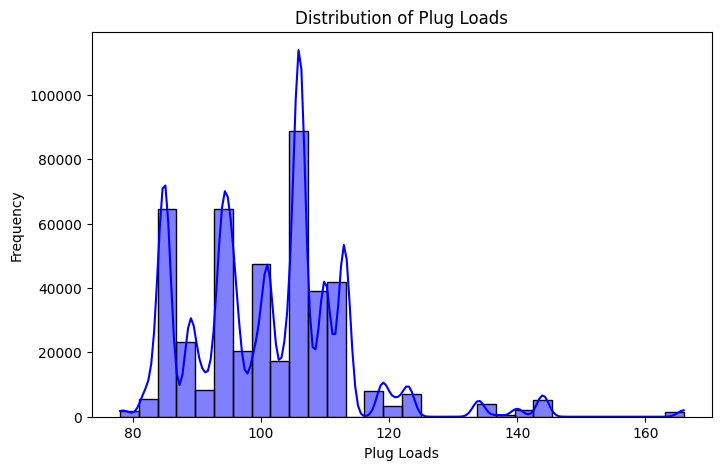

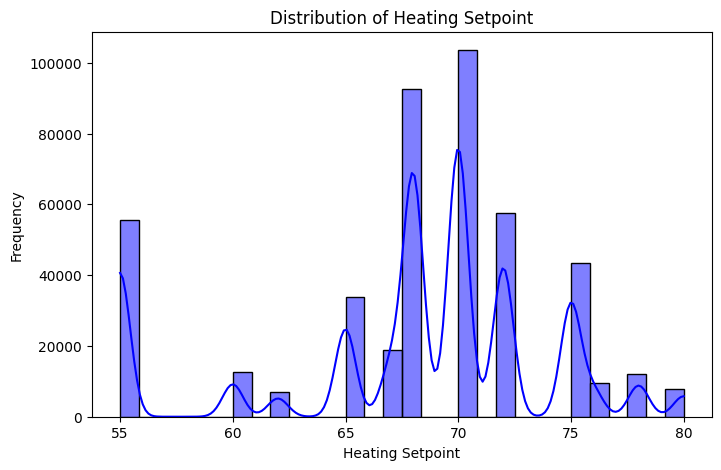

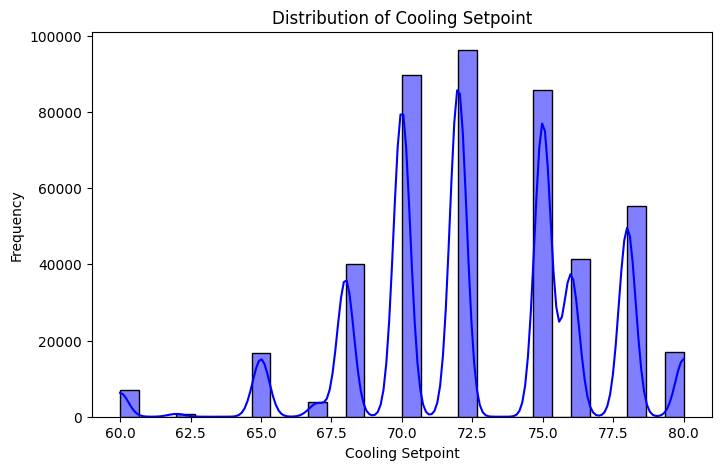

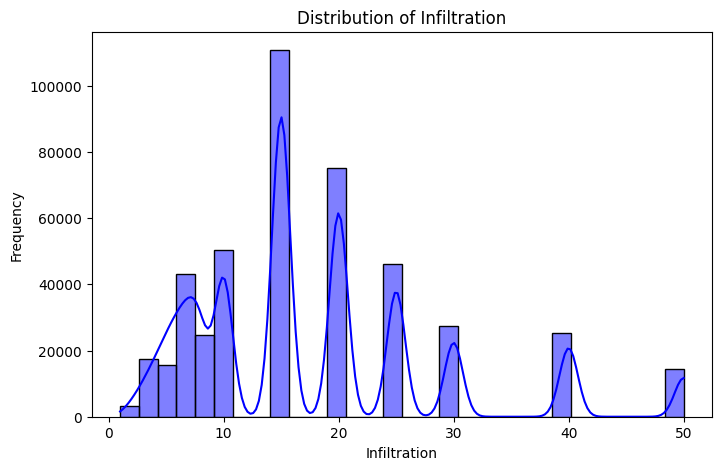

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Plug Loads','Heating Setpoint', 'Cooling Setpoint', 'Infiltration']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


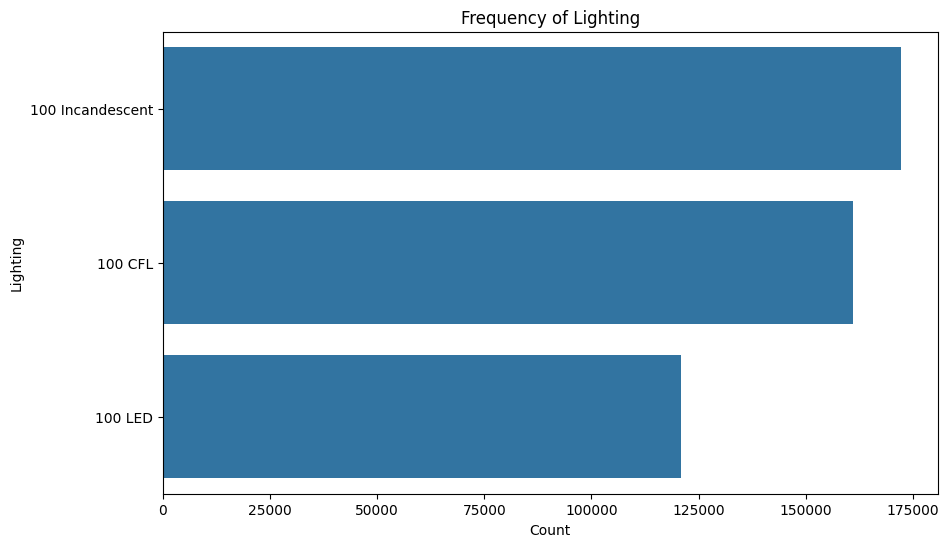

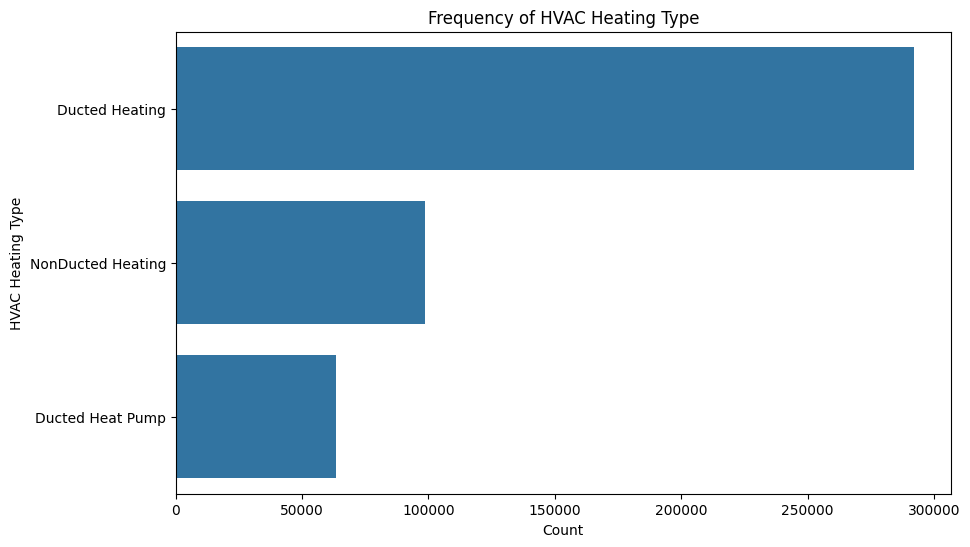

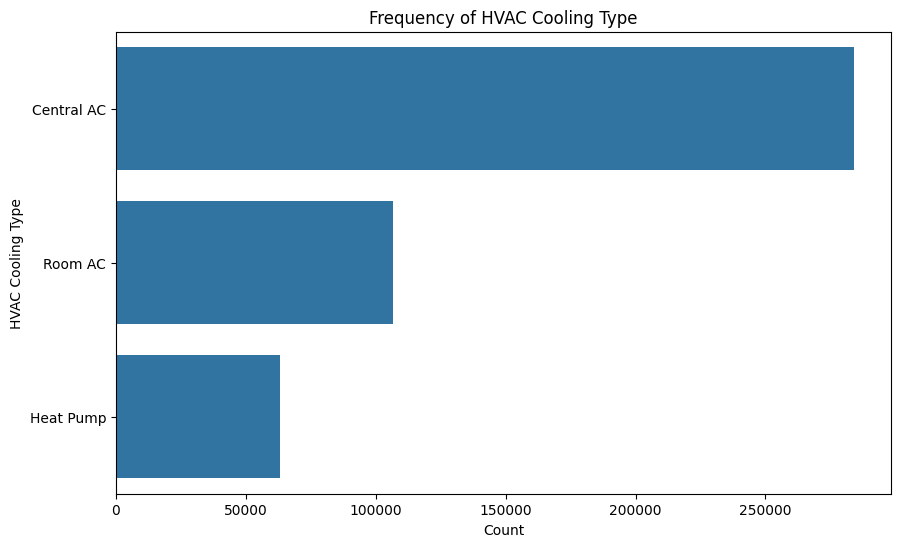

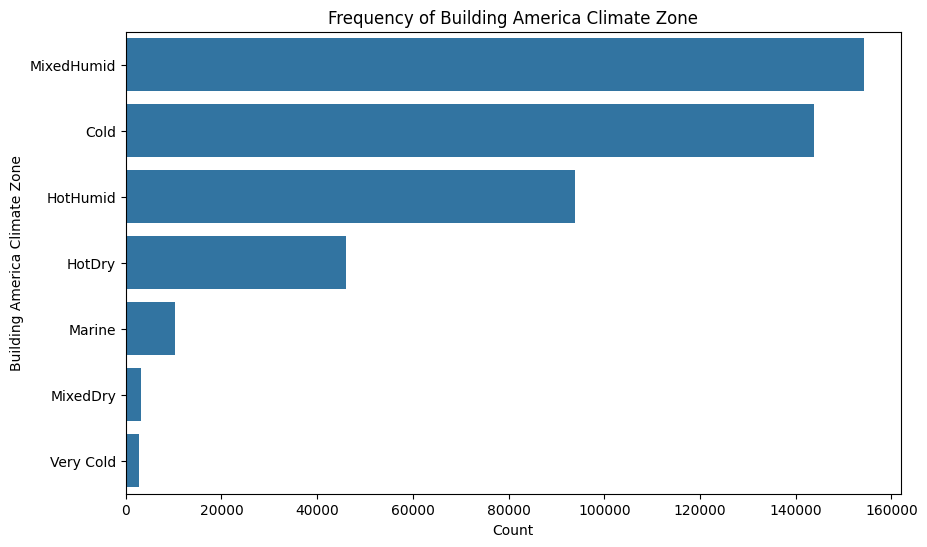

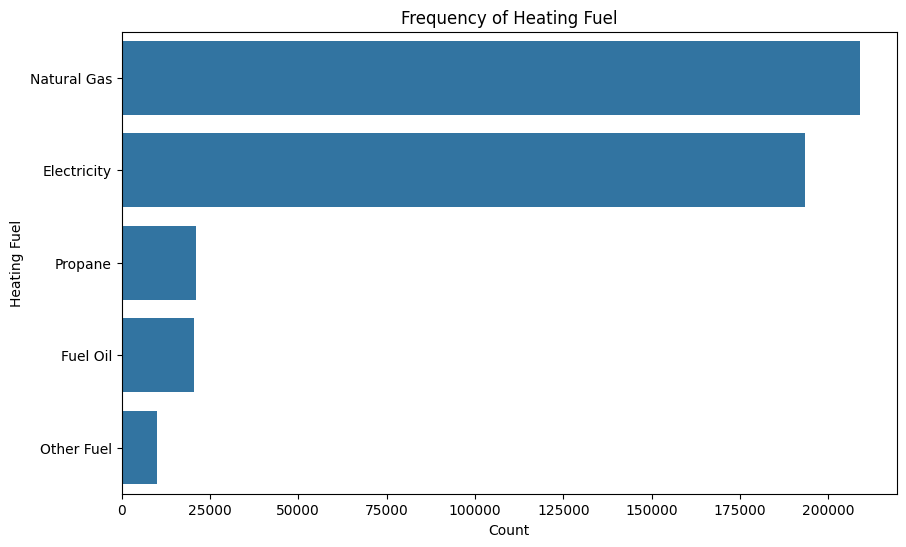

In [ ]:
categorical_columns = [
    'Lighting', 'HVAC Heating Type', 'HVAC Cooling Type',
    'Building America Climate Zone','Heating Fuel'
]

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_cleaned[column], order=df_cleaned[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()


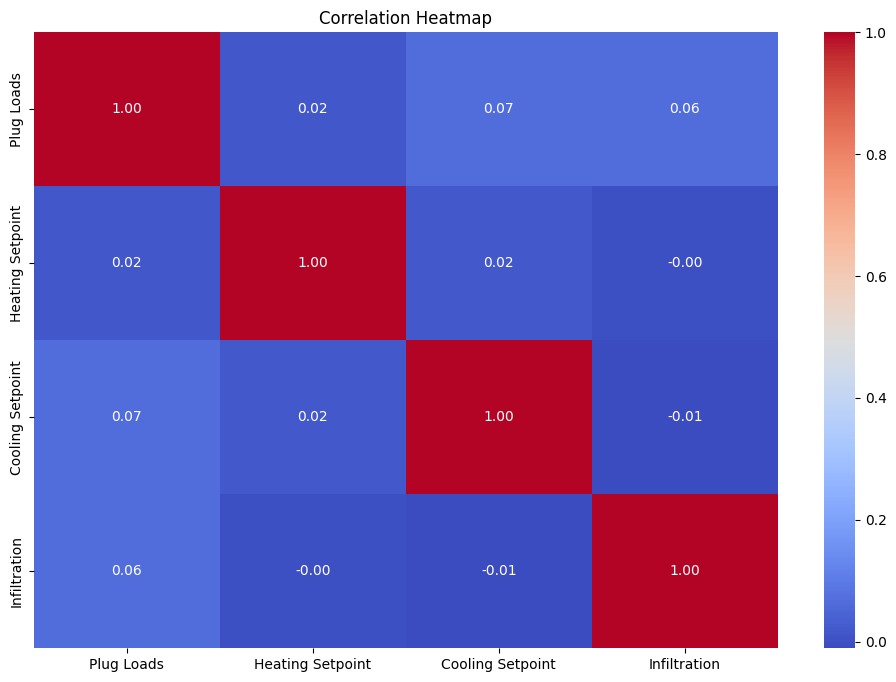

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


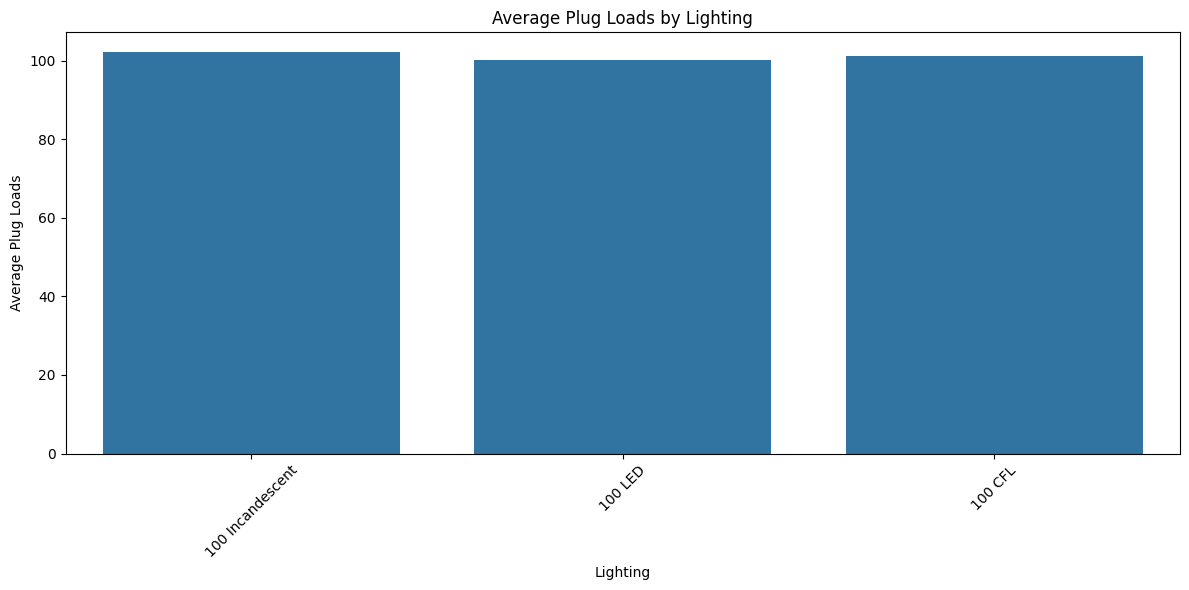

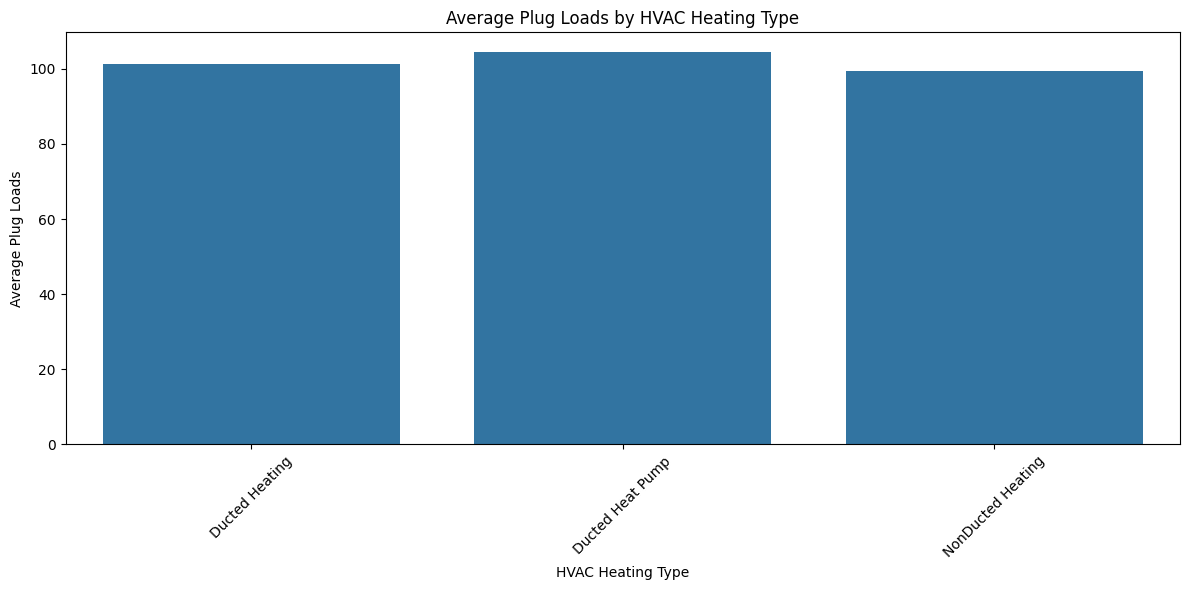

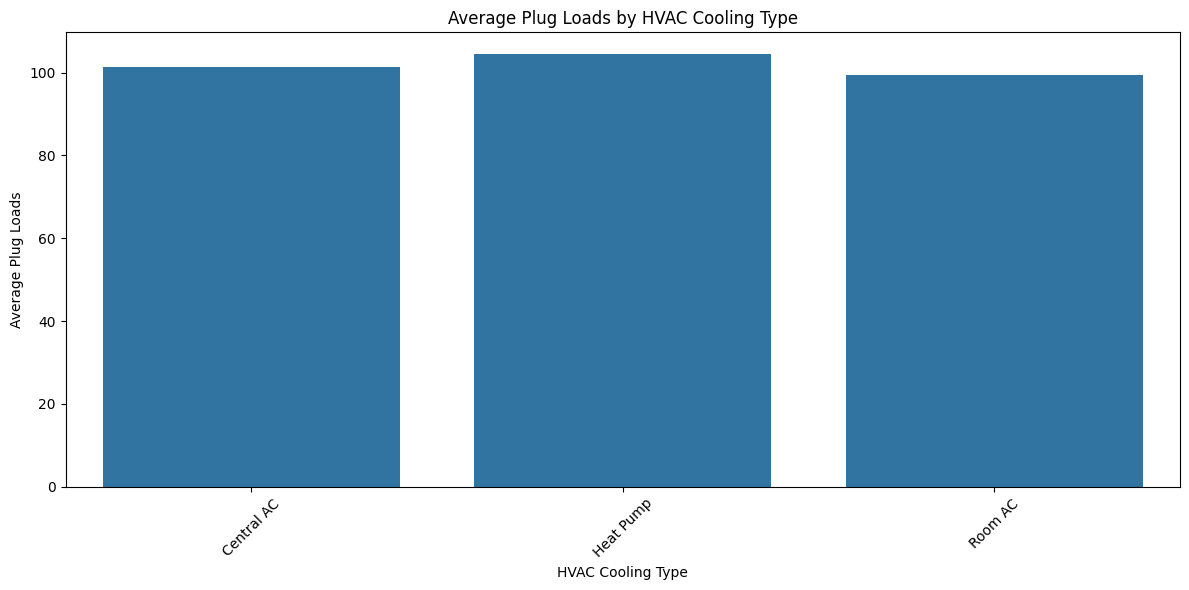

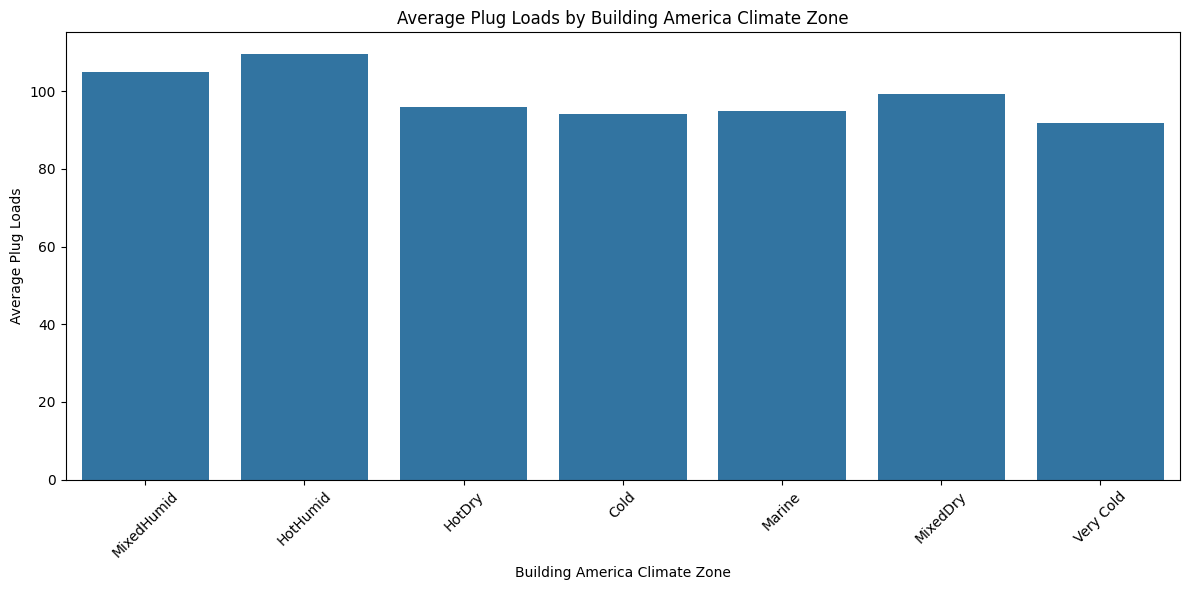

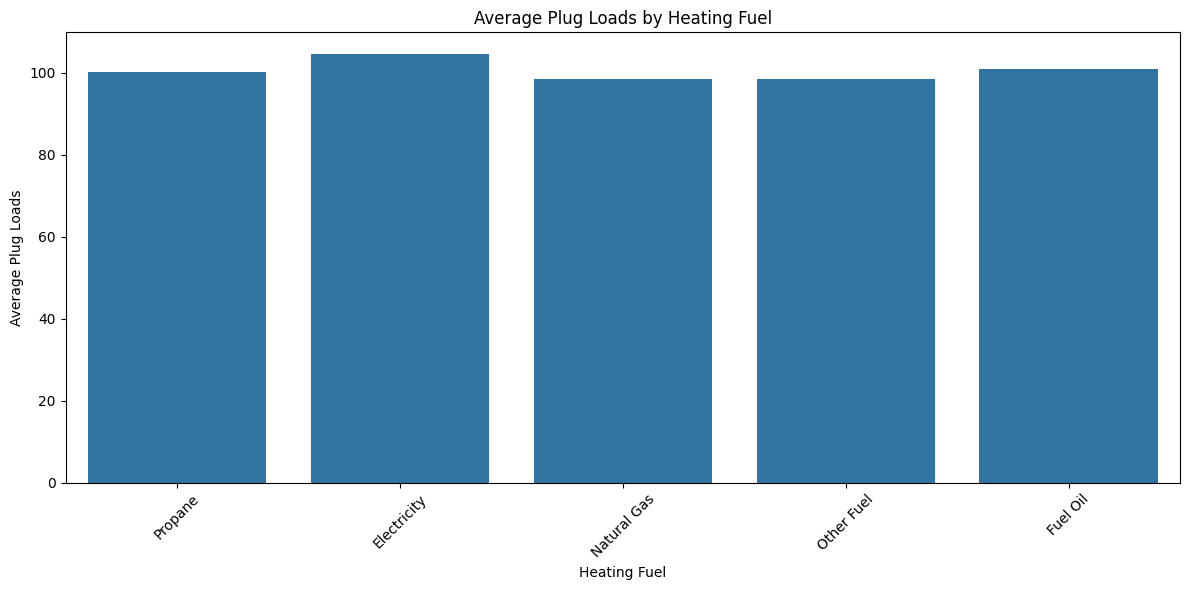

In [ ]:
# bar plots for each categorical variable with respect to 'Plug Loads'
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_cleaned, x=column, y='Plug Loads', errorbar=None, estimator='mean')
    plt.title(f'Average Plug Loads by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Plug Loads')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


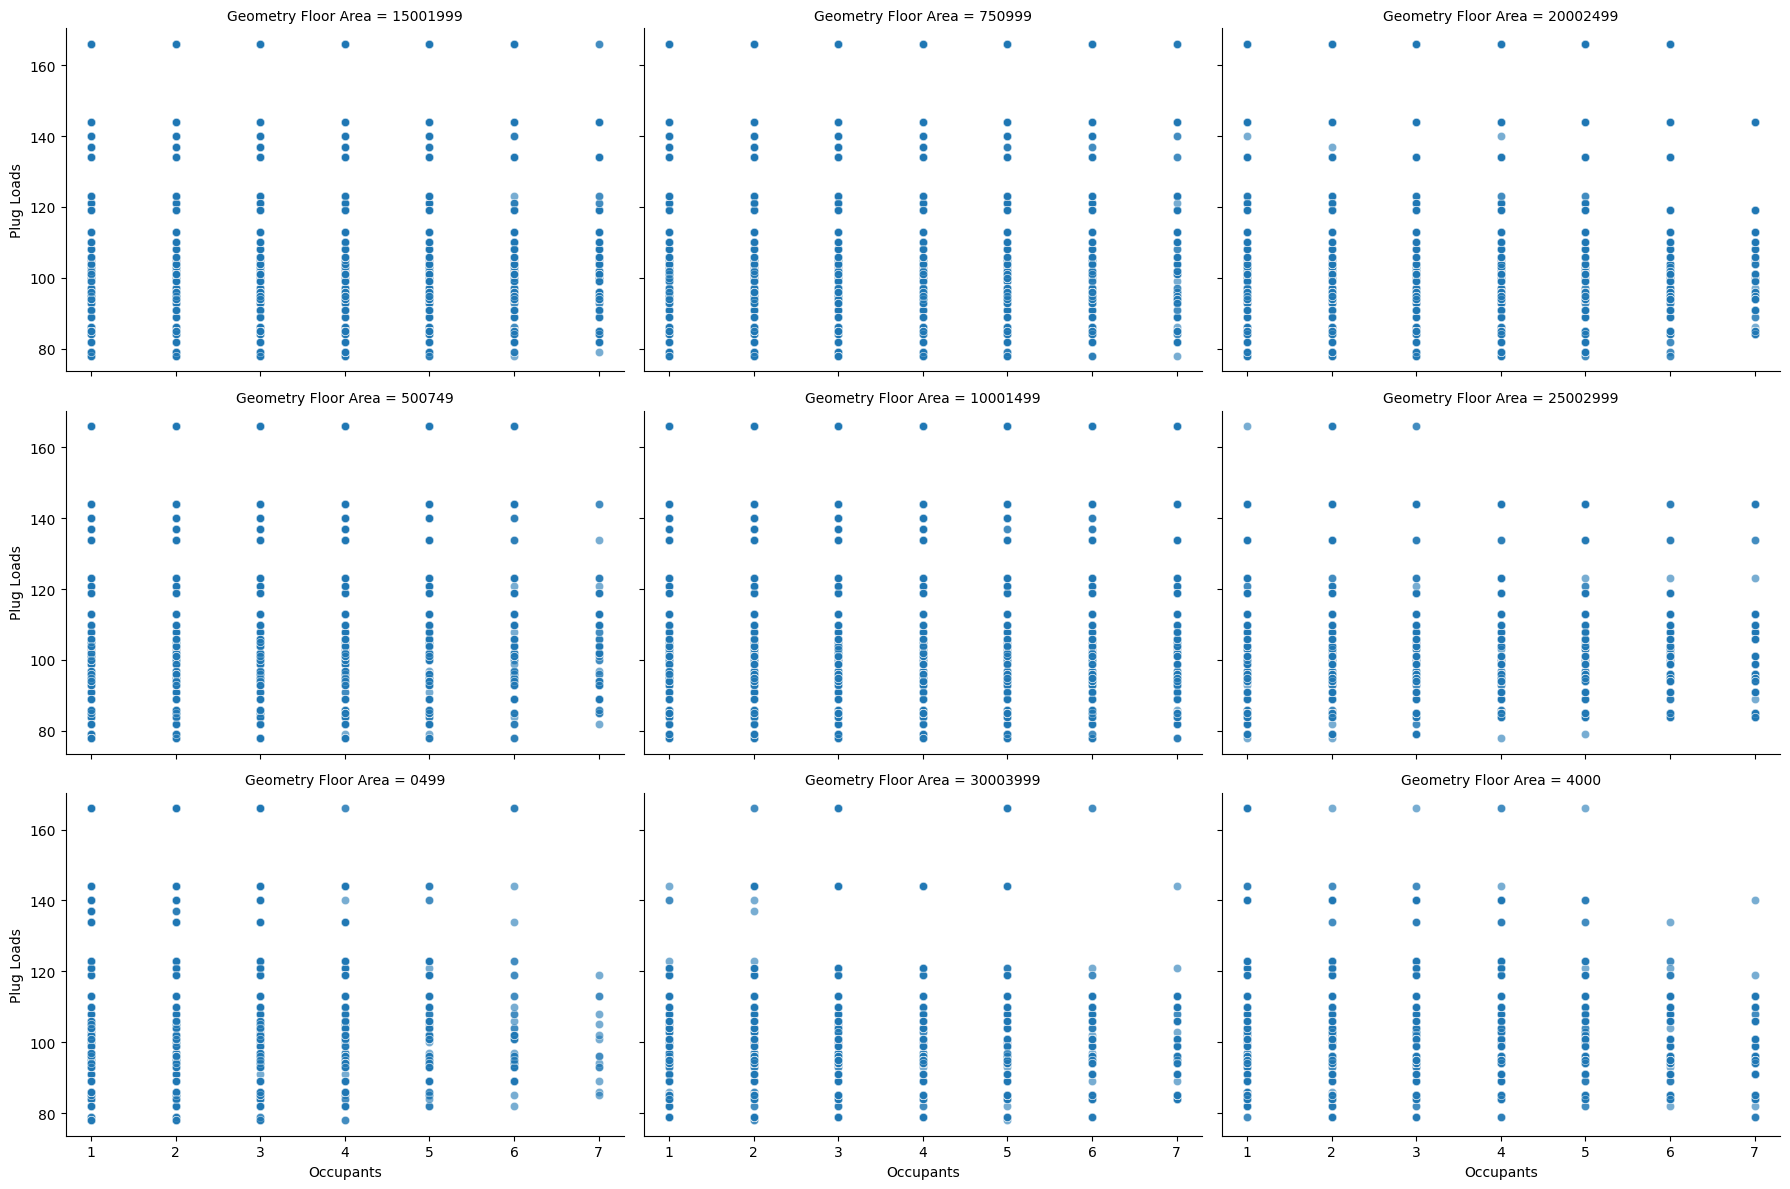

In [ ]:
g = sns.FacetGrid(df_cleaned, col="Geometry Floor Area", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, 'Occupants', 'Plug Loads', alpha=0.6)
g.set_titles("Geometry Floor Area = {col_name}")
g.set_axis_labels("Occupants", "Plug Loads")
g.tight_layout()
plt.show()


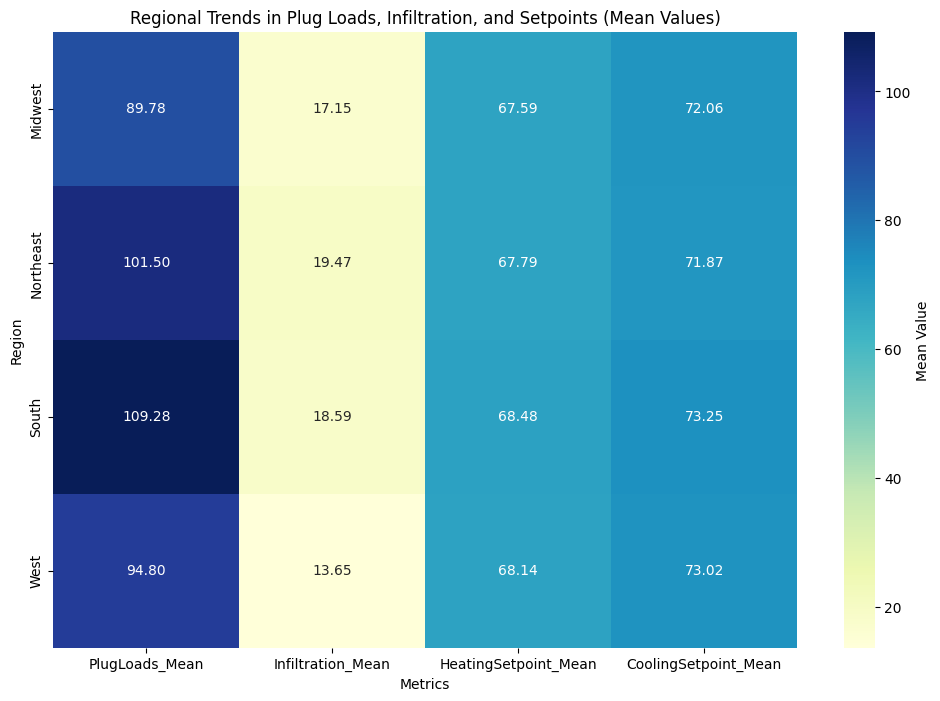

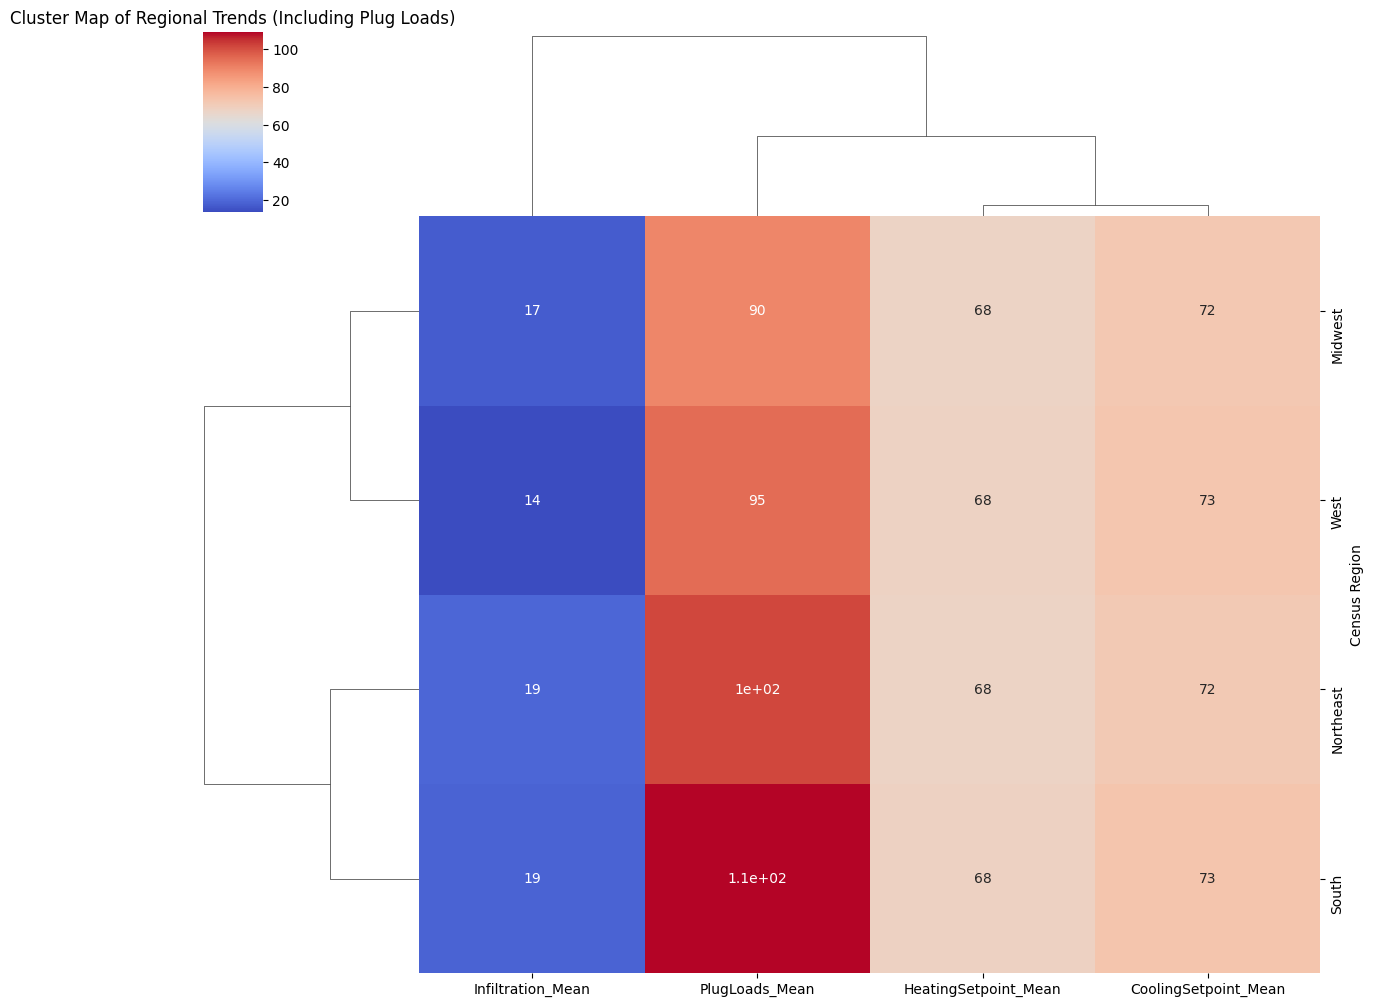

In [ ]:

grouping_column = 'Census Region'

regional_stats = df_cleaned.groupby(grouping_column).agg({
    'Plug Loads': ['mean', 'std'],
    'Infiltration': ['mean', 'std'],
    'Heating Setpoint': ['mean', 'std'],
    'Cooling Setpoint': ['mean', 'std']
}).reset_index()

regional_stats.columns = [grouping_column,
                          'PlugLoads_Mean', 'PlugLoads_Std',
                          'Infiltration_Mean', 'Infiltration_Std',
                          'HeatingSetpoint_Mean', 'HeatingSetpoint_Std',
                          'CoolingSetpoint_Mean', 'CoolingSetpoint_Std']

# Heatmap for Mean Values
mean_values = regional_stats[[grouping_column, 'PlugLoads_Mean', 'Infiltration_Mean',
                               'HeatingSetpoint_Mean', 'CoolingSetpoint_Mean']].set_index(grouping_column)

plt.figure(figsize=(12, 8))
sns.heatmap(mean_values, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Mean Value'})
plt.title("Regional Trends in Plug Loads, Infiltration, and Setpoints (Mean Values)")
plt.ylabel("Region")
plt.xlabel("Metrics")
plt.show()

# Cluster Map for Mean Values
sns.clustermap(mean_values, annot=True, cmap="coolwarm", figsize=(12, 10), metric="euclidean", method="ward")
plt.title("Cluster Map of Regional Trends (Including Plug Loads)")
plt.show()


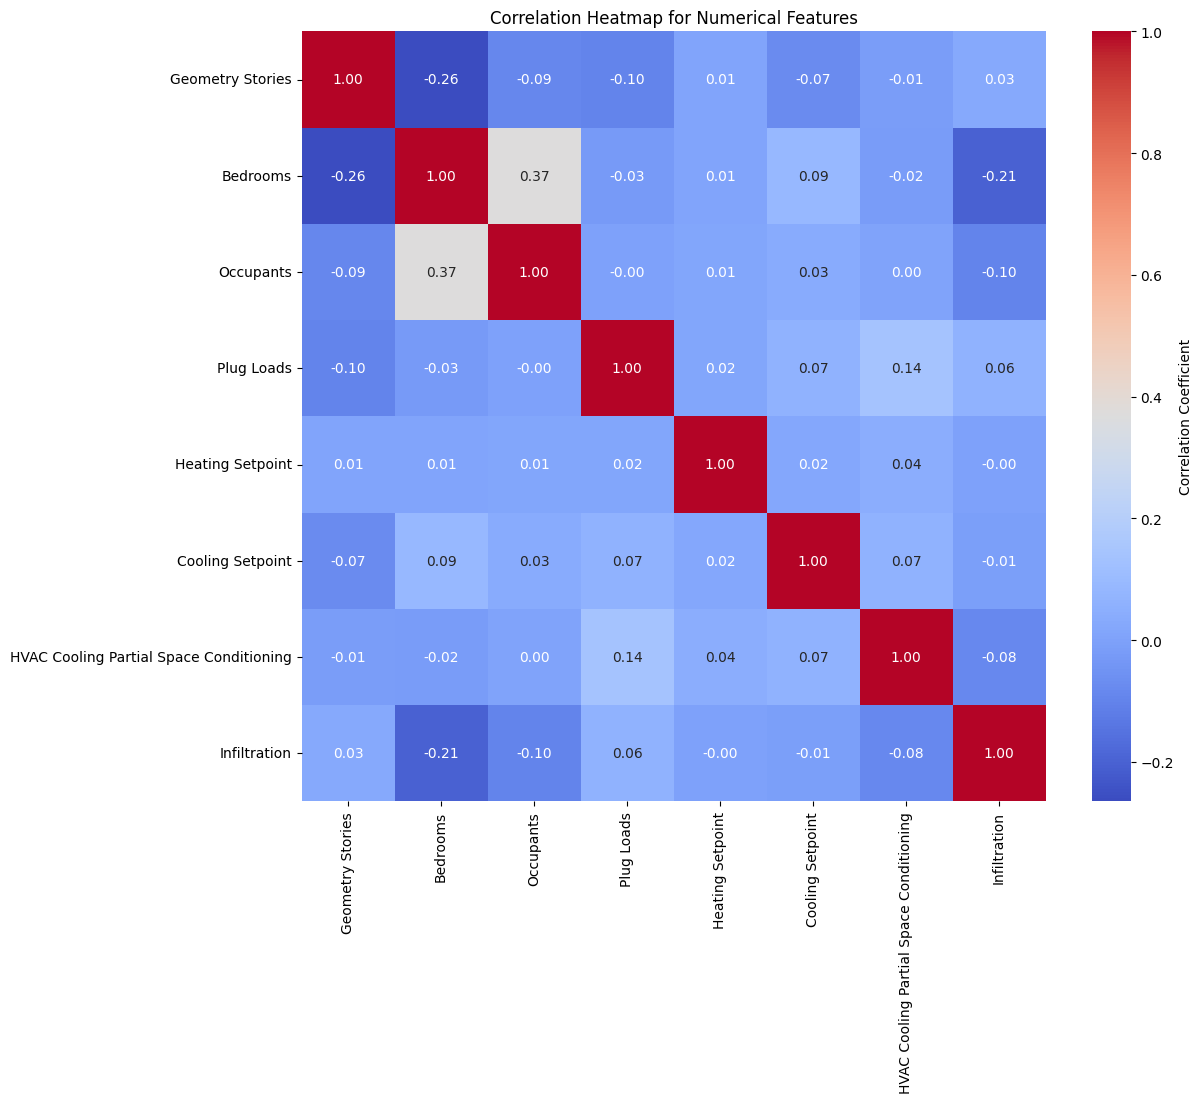

In [ ]:
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

#correlation matrix
correlation_matrix = df_cleaned[numeric_features].corr()

#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

**Key Take Aways from the EDA:**
- The variables are largely independent of each other.
- There is no strong linear relationship between these features.
- Plug Loads do not consistently increase with the number of Occupants in any panel.
- Plug Loads appear fairly stable across floor area categories.
- Plug loads are influenced by climate conditions, with humid regions showing higher usage, likely due to appliances required to manage temperature and humidity levels.


- **One Hot Encoding categorical columns**

In [ ]:
# Taking a subest of the data for further analysis
df_subset = df_cleaned.sample(n=75000, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = [
    'Lighting', 'HVAC Heating Type', 'HVAC Cooling Type', 'Census Region',
    'Building America Climate Zone', 'State', 'Heating Fuel' ,'HVAC Heating Efficiency', 'HVAC Cooling Efficiency',
]

# One-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=categorical_columns, drop_first=True)


In [ ]:
df_encoded.shape

(75000, 105)

In [ ]:
# Extracting R-values from 'Insulation Wall'
df_encoded['Wall R-Value'] = df_encoded['Insulation Wall'].str.extract(r'R(\d+)').astype(float)


In [ ]:
numerical_columns = [
    'Geometry Floor Area', 'Occupants', 'Heating Setpoint',
    'Cooling Setpoint', 'Infiltration'
]

# Normalizing the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])


- The features in the dataset, such as Plug Loads (higher range), Infiltration (lower range), Heating/Cooling Setpoints (narrow range), Floor Area (large range), and Occupants (high range), have varying magnitudes, which can lead to imbalances in their contribution during model training. Without standardization, features with higher values could dominate the model, while those with smaller ranges might be underrepresented.
- To ensure fair contribution and improve model performance, it's essential to standardize these features, bringing them to a common scale so that each feature can contribute equally to the training process.

In [ ]:
df_scaled.head()

,Geometry Floor Area,Geometry Stories,Geometry Building Type Height,Bedrooms,Occupants,Plug Loads,Heating Setpoint,Cooling Setpoint,HVAC Cooling Partial Space Conditioning,Insulation Wall,...,HVAC Cooling Efficiency_AC SEER 13,HVAC Cooling Efficiency_AC SEER 15,HVAC Cooling Efficiency_AC SEER 8,HVAC Cooling Efficiency_Heat Pump,HVAC Cooling Efficiency_Room AC EER 107,HVAC Cooling Efficiency_Room AC EER 120,HVAC Cooling Efficiency_Room AC EER 85,HVAC Cooling Efficiency_Room AC EER 98,HVAC Cooling Efficiency_Shared Cooling,Wall R-Value
212800,-0.227069,1,SingleFamily Detached,4,1.875941,95.0,0.307898,-0.177475,100.0,Wood Stud Uninsulated,...,False,False,False,False,False,False,False,False,False,NaN
215221,-0.227069,2,SingleFamily Detached,4,1.875941,85.0,-0.017227,-0.677471,100.0,Brick 12in 3wythe Uninsulated,...,False,True,False,False,False,False,False,False,False,NaN
486688,1.457208,2,SingleFamily Detached,3,1.141054,106.0,-0.017227,-0.177475,100.0,CMU 6in Hollow R19,...,False,True,False,False,False,False,False,False,False,19.0
267468,-0.227069,1,SingleFamily Detached,3,-1.063607,101.0,-0.017227,-1.427465,100.0,Wood Stud R19,...,False,True,False,False,False,False,False,False,False,19.0
495177,-0.227069,2,SingleFamily Detached,2,-0.328720,85.0,-0.992603,-0.677471,20.0,Wood Stud Uninsulated,...,False,False,False,False,False,False,True,False,False,NaN


In [ ]:

# One-hot encode material types in 'Insulation Wall'
df_scaled = pd.get_dummies(df_scaled, columns=['Insulation Wall'], prefix='Insulation', drop_first=True)

# window areas
def calculate_window_area(area_str):
    if pd.isna(area_str):
        return np.nan
    areas = [int(value[1:]) for value in area_str.split() if value[1:].isdigit()]
    return sum(areas)

df_scaled['Total Window Area'] = df_scaled['Window Areas'].apply(calculate_window_area)

df_scaled.drop(columns=['Window Areas'], inplace=True)




- NO PCA since features are not linearly correlated.
- Random Forest and Gradient Boosting can handle the features directly without requiring dimensionality reduction.


**Modelling**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['Plug Loads'])
y = df_scaled['Plug Loads']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- The dataset is divided into two subsets: the training data and the testing data. The training data, which constitutes 80% of the total dataset, is used to train the model by teaching it patterns and relationships within the data.
- The testing data, making up the remaining 20%, is used to evaluate the model’s performance and assess how well it generalizes to new, unseen data.
- This separation of data ensures that the model is not overfitted to the training set and can reliably perform in real-world scenarios.
- The target variable for this model is "Plug Loads."

In [ ]:
# Count missing values in each column and sort in descending order
missing_values = X_train.isnull().sum().sort_values(ascending=False)

# Print the result
print(missing_values)


Wall R-Value                                     23681
Geometry Floor Area                                  0
HVAC Heating Efficiency_Fuel Furnace 925 AFUE        0
HVAC Heating Efficiency_Fuel Furnace 76 AFUE         0
HVAC Heating Efficiency_Fuel Furnace 60 AFUE         0
                                                 ...  
State_IL                                             0
State_ID                                             0
State_IA                                             0
State_GA                                             0
Total Window Area                                    0
Length: 118, dtype: int64


In [ ]:

categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align columns to ensure compatibility between train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


Categorical Columns: Index(['Geometry Building Type Height'], dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_scaled['Wall R-Value'] = imputer.fit_transform(df_scaled[['Wall R-Value']])


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train['Wall R-Value'] = imputer.fit_transform(X_train[['Wall R-Value']])
X_test['Wall R-Value'] = imputer.transform(X_test[['Wall R-Value']])


In [ ]:
print("Missing values in Wall R-Value (X_train):", X_train['Wall R-Value'].isnull().sum())
print("Missing values in Wall R-Value (X_test):", X_test['Wall R-Value'].isnull().sum())


Missing values in Wall R-Value (X_train): 0
Missing values in Wall R-Value (X_test): 0


**Models Selected**
- Linear Regression (Linear Model)
- Random Forest Regression ( Tree-Based Model)
- Gradient Boosting Regression ( Tree-Based Model)
- Support Vector Regression(Kernel-Based Model)
- In this analysis, we developed a regression pipeline aimed at predicting the 'Plug Loads' variable.
- By excluding the 'Plug Loads' column, we formed the feature matrix, X, and extracted the corresponding target vector, y, to train and evaluate our models.
- We implemented multiple models from distinct families, including Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regression (SVR).
- Each model was integrated into a pipeline incorporating preprocessing steps, such as feature scaling where necessary.
- After fitting the models to the training data, predictions were generated on the testing set, enabling evaluation through performance metrics like Root Mean Squared Error (RMSE) and R² Value.



- Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE: ",lr_rmse)
print("Linear Regression R²: ",lr_r2)


Linear Regression RMSE:  7.4906061033171
Linear Regression R²:  0.6284083486037252


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Served as a baseline model, offering a simple yet interpretable approach. However, its RMSE was relatively high, and the R² score indicated that it struggled to explain much of the variance in Plug Loads, likely due to its inability to capture non-linear relationships in the data.


- **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE: ",rf_rmse)
print("Random Forest R²: ",rf_r2)


Random Forest RMSE:  0.5841421687683002
Random Forest R²:  0.9977402044694659


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Random Forest Regressor performed significantly better than Linear Regression, leveraging its ensemble approach to model complex interactions between features.
- It demonstrated a lower RMSE and a higher R² score, suggesting improved predictive accuracy. Additionally, its feature importance analysis provided valuable insights into the most critical drivers of energy usage.


- **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
gbr_rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)
gbr_r2 = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting RMSE: ",gbr_rmse)
print("Gradient Boosting R²: " ,gbr_r2)


Gradient Boosting RMSE:  5.740087494947241
Gradient Boosting R²:  0.7817928120965368


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Gradient Boosting Regressor achieved the best performance among the models, with the lowest RMSE and the highest R² score. Its iterative learning process and ability to minimize residual errors enabled it to capture nuanced patterns in the data, making it the most effective model for predicting Plug Loads.


- **Support Vector Regression**

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

svr_rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
svr_r2 = r2_score(y_test, y_pred_svr)

print("Support Vector Regression RMSE: ",svr_rmse)
print("Support Vector Regression R²: ",svr_r2)


Support Vector Regression RMSE:  10.986518201920811
Support Vector Regression R²:  0.20062200867312596


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- The Support Vector Regression (SVR) model shows poor performance with a high RMSE (10.99) and a low R² score (0.20). This indicates that the model struggles to capture the variance in the target variable, explaining only 20% of it.
- The results suggest that SVR may not be well-suited for this dataset or requires further hyperparameter tuning to improve its performance.


** THE PROBLEM :**  - Overfitting for Random forest regressor  
- Used feature selection to train the model more on important features which reduced the R² score to 0.99 to 0.90
- The extremely high R² of 0.998 previously indicated potential overfitting, as the model was likely memorizing patterns in the training data rather than generalizing to unseen data. The reduced R² (0.90) suggests that the model is now better generalized and less overfit.


- We used cross-validation and comparing the training and testing metrics is to evaluate the generalization ability the model which yielded following results :


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
rmse_scores = (-scores) ** 0.5
print("Cross-Validation RMSE:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())


Cross-Validation RMSE: [0.90860006 0.68310545 0.77610361 0.59870189 0.66528112]
Mean RMSE: 0.7263584234168736


In [ ]:
# comparing the training and testing metrics to evaluate the generalization ability the model
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")

print("\nTesting Metrics:")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")


Training Metrics:
RMSE: 0.19254827965993362
R²: 0.9997620123941148

Testing Metrics:
RMSE: 0.5841421687683002
R²: 0.9977402044694659


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 **Feature Importance Extraction** :
- By identifying the most important features and discarding less important or irrelevant ones, we simplified the model. By removing less significant features, the model becomes less complex, and its focus is placed only on the variables that actually contribute to the prediction.
- This reduces the risk of overfitting because the model is less likely to pick up on noise from irrelevant features.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print("Top 10 Important Features:")
print(feature_importances.sort_values(ascending=False).head(10))

Top 10 Important Features:
Census Region_South                                                  0.325384
Geometry Building Type Height_Multifamily with 24 Units              0.123171
Geometry Stories                                                     0.095731
Census Region_Northeast                                              0.071601
Geometry Building Type Height_SingleFamily Detached                  0.049291
Geometry Building Type Height_SingleFamily Attached                  0.042790
Geometry Building Type Height_Multifamily with 5 units 13 stories    0.031920
State_AZ                                                             0.027727
State_FL                                                             0.016451
State_SC                                                             0.016235
dtype: float64


In [ ]:

importance_threshold = 0.01
important_features = feature_importances[feature_importances > importance_threshold].index

X_train= X_train[important_features]
X_test= X_test[important_features]

print(f"Retained {len(important_features)} features out of {len(X_train.columns)}")
print("Important Features:", list(important_features))


Retained 17 features out of 17
Important Features: ['Geometry Stories', 'Census Region_Northeast', 'Census Region_South', 'Census Region_West', 'State_AZ', 'State_FL', 'State_GA', 'State_KY', 'State_NC', 'State_NM', 'State_SC', 'State_TN', 'State_VA', 'Geometry Building Type Height_Multifamily with 24 Units', 'Geometry Building Type Height_Multifamily with 5 units 13 stories', 'Geometry Building Type Height_SingleFamily Attached', 'Geometry Building Type Height_SingleFamily Detached']


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse = (-cv_scores) ** 0.5

print("Cross-Validation RMSE for each fold:", cv_rmse)
print("Mean Cross-Validation RMSE:", cv_rmse.mean())

Cross-Validation RMSE for each fold: [3.85093074 3.86645796 4.20393903 4.11916329 3.88450176]
Mean Cross-Validation RMSE: 3.984998557344267


- These cross-validation results suggest that the model is performing reasonably well after feature selection, with a mean RMSE close to 4. The variation between folds indicates that the model performs consistently

**Hyper parameter tuning:**
- We used hyperparameter tuning for Random forest regressor and Gradient Boosting Regressor (GBR) using GridSearchCV with features that were extracted, followed by evaluating the optimized model on the test set.
- Main goal was to improve the performance of the model.


In [ ]:
#Hyper parameter tuning on Random forest regressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation RMSE:", (-grid_search.best_score_) ** 0.5)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation RMSE: 3.987647855908784


In [ ]:

best_rf = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = best_rf.predict(X_test)
rff_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rff_r2 = r2_score(y_test, y_pred_test)

print("Test RMSE:", rff_rmse)
print("Test R²:", rff_r2)


Test RMSE: 3.823313970563193
Test R²: 0.903191842311146


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- R² Decrease from 0.99 to 0.90:

- The extremely high R² of 0.998 previously indicated potential overfitting, as the model was likely memorizing patterns in the training data rather than generalizing to unseen data.
The reduced R² (0.90) suggests that the model is now better generalized and less overfit.

- Higher RMSE:

- The increase in RMSE (0.58 to 3.82) is a result of reduced complexity, meaning the model no longer tries to overfit every minor detail in the data.
While a higher RMSE can seem unfavorable, it often represents a trade-off for better generalization.

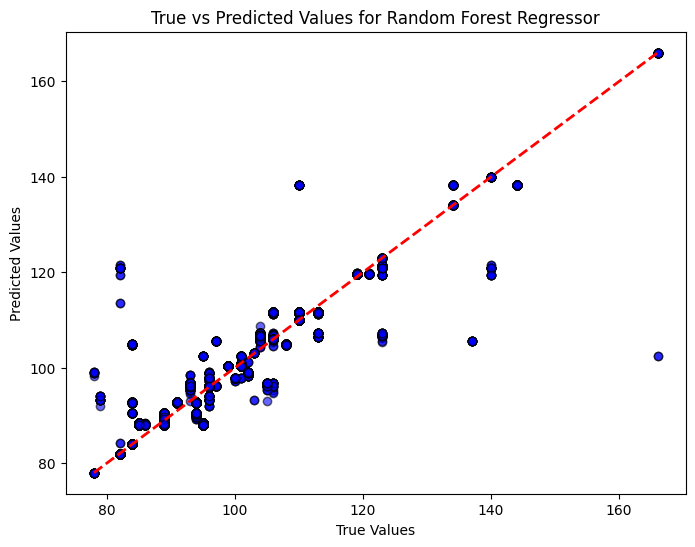

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', edgecolors='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values for Random Forest Regressor")
plt.show()

In [ ]:
# Hyperparameter tuning on Gradient Boosting Regressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best RMSE from Grid Search: {best_score ** 0.5:.4f}")

best_model = grid_search.best_estimator_
y_pred_gbr = best_model.predict(X_test)

gbr_rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)
gbr_r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Test RMSE: {gbr_rmse:.4f}")
print(f"Gradient Boosting Test R²: {gbr_r2:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Best RMSE from Grid Search: 4.1510
Gradient Boosting Test RMSE: 4.0353
Gradient Boosting Test R²: 0.8922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


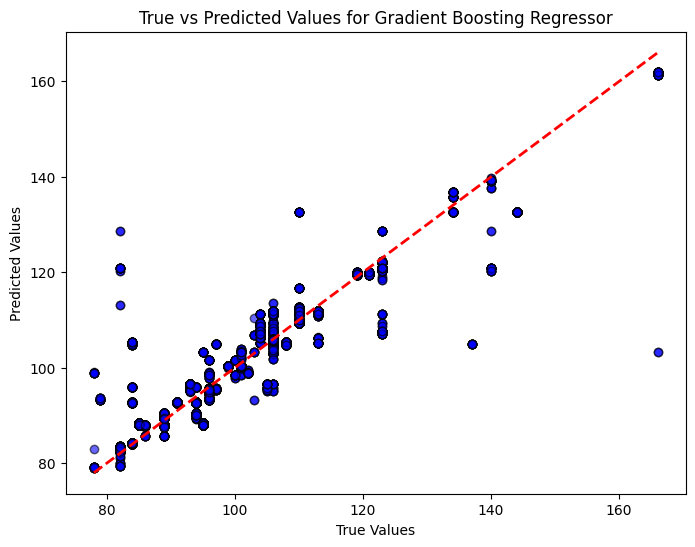

In [ ]:
# True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, color='blue', edgecolors='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values for Gradient Boosting Regressor")
plt.show()

In [ ]:
import pandas as pd

# Performance metrics for each model
model_performance = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Support Vector Regression'],
    'RMSE': [lr_rmse, rff_rmse, gbr_rmse, svr_rmse],
    'R² Score': [lr_r2, rff_r2, gbr_r2, svr_r2]
}

performance_df = pd.DataFrame(model_performance)

print(performance_df)


                         Model       RMSE  R² Score
0            Linear Regression   7.490606  0.628408
1      Random Forest Regressor   3.823314  0.903192
2  Gradient Boosting Regressor   4.035326  0.892158
3    Support Vector Regression  10.986518  0.200622


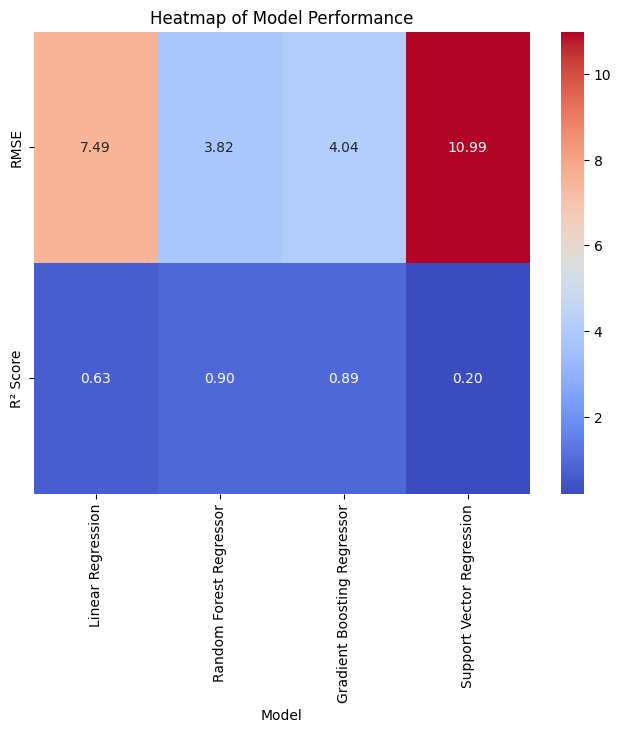

In [ ]:
performance_df.set_index('Model', inplace=True)
plt.figure(figsize=(8, 6))
sns.heatmap(performance_df.T, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Heatmap of Model Performance')
plt.show()

- The heatmap clearly highlights that Random Forest and Gradient Boosting are the most effective models for predicting the target variable, while SVR is not suitable for this dataset.

**Summary**

- The model comparison reveals varying performances in predicting plug loads. Random Forest Regressor stands out with the lowest RMSE (0.5841) and the highest R² score (0.9077), indicating strong predictive accuracy and ability to explain the variance in the target variable.
- Gradient Boosting Regressor also performs well with an RMSE of 4.0353 and an R² score of 0.8922, showcasing its capacity to model complex relationships, though slightly less effective than Random Forest.
- Linear Regression achieves moderate results (RMSE: 7.4906, R²: 0.6284), serving as a baseline model.
- In contrast, Support Vector Regression struggles significantly, with a high RMSE (10.9865) and a low R² score (0.2006), highlighting its limitations for this dataset.
- Overall, tree-based models prove to be the most effective for this task.

